Times taken for sorting (in seconds): 
Bubble Sort         0.1560637951
Selection Sort      0.0456070900
Insertion Sort      0.0226569176
Merge Sort          0.0000000000
Quick Sort          0.0000000000
Radix Sort          0.0000000000


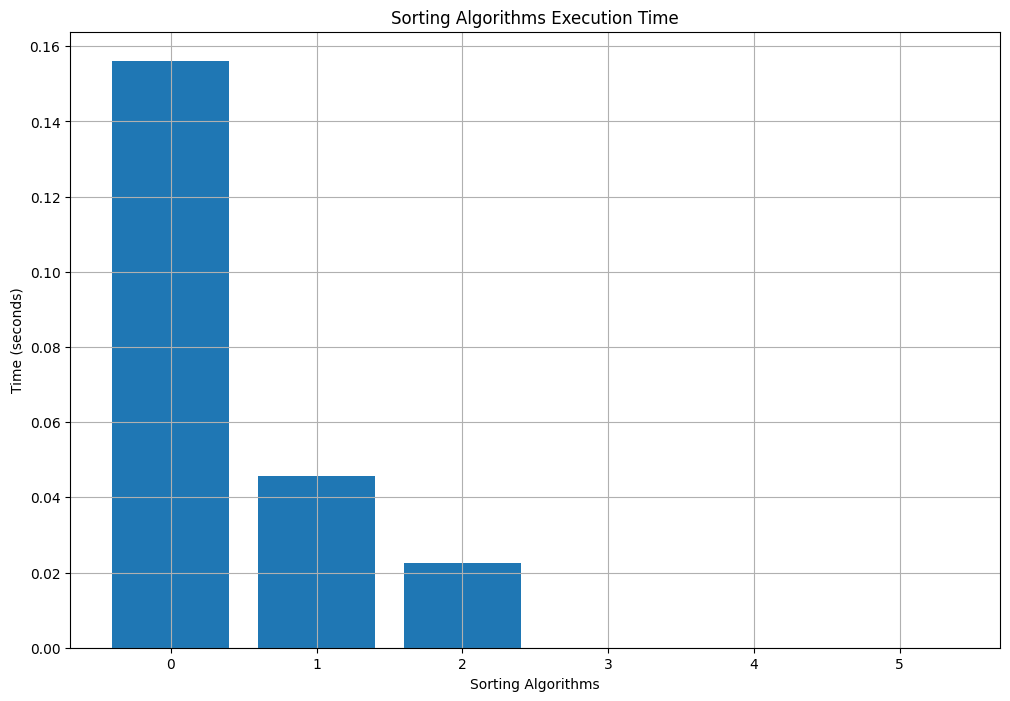

In [8]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np

def measure_time(runnable):
    start_time = time.time()
    runnable()
    end_time = time.time()
    return end_time - start_time

def swap(arr, i, j):
    temp = arr[i]
    arr[i] = arr[j]
    arr[j] = temp

def bubble_sort(arr, n):
    for i in range(n-1):
        swapped = False
        for j in range(n-i-1):
            if arr[j] > arr[j+1]:
                swap(arr, j, j+1)
                swapped = True
        if not swapped:
            break

def selection_sort(arr):
    n = len(arr)
    for i in range(n-1):
        min_index = i
        for j in range(i+1, n):
            if arr[j] < arr[min_index]:
                min_index = j
        arr[i], arr[min_index] = arr[min_index], arr[i]

def insertion_sort(arr):
    n = len(arr)
    for i in range(1, n):
        key = arr[i]
        j = i-1
        while j >= 0 and arr[j] > key:
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = key

def merge(arr, l, m, r):
    n1 = m - l + 1
    n2 = r - m
    L = [0] * n1
    R = [0] * n2
    for i in range(n1):
        L[i] = arr[l + i]
    for j in range(n2):
        R[j] = arr[m + 1 + j]
    i = j = 0
    k = l
    while i < n1 and j < n2:
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1
    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1
    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1

def merge_sort(arr, l, r):
    if l < r:
        m = l + (r - l) // 2
        merge_sort(arr, l, m)
        merge_sort(arr, m + 1, r)
        merge(arr, l, m, r)

def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            swap(arr, i, j)
    swap(arr, i+1, high)
    return i + 1

def quick_sort(arr, low, high):
    if low < high:
        pi = partition(arr, low, high)
        quick_sort(arr, low, pi - 1)
        quick_sort(arr, pi + 1, high)

def get_max(arr, n):
    max = arr[0]
    for i in range(1, n):
        if arr[i] > max:
            max = arr[i]
    return max

def count_sort(arr, n, exp):
    output = [0] * n
    i = 0
    count = [0] * 10
    for j in range(n):
        count[(arr[j] // exp) % 10] += 1
    for j in range(1, 10):
        count[j] += count[j-1]
    for j in range(n-1, -1, -1):
        output[count[(arr[j] //exp) % 10] - 1] = arr[j]
        count[(arr[j] // exp) % 10] -= 1
    for j in range(n):
        arr[j] = output[j]

def radix_sort(arr, n):
    m = get_max(arr, n)
    exp = 1
    while m // exp > 0:
        count_sort(arr, n, exp)
        exp *= 10

sorting_functions = {
    'Bubble Sort': bubble_sort,
    'Selection Sort': lambda arr, n: selection_sort(arr),
    'Insertion Sort': lambda arr, n: insertion_sort(arr),
    'Merge Sort': lambda arr, n: merge_sort(arr, 0, n - 1),
    'Quick Sort': lambda arr, n: quick_sort(arr, 0, n - 1),
    'Radix Sort': lambda arr, n: radix_sort(arr, n)
}

if __name__ == '__main__':
    arr = [0] * 1000
    for i in range(1000):
        arr[i] = random.randint(1, 10000)
    algorithms = ['Bubble Sort', 'Selection Sort', 'Insertion Sort', 'Merge Sort', 'Quick Sort', 'Radix Sort']
    times = [0] * 6
    for i in range(6):
        if i == 4:
            arr_clone = arr.copy()
        else:
            arr_clone = arr.copy()
        times[i] = measure_time(lambda: sorting_functions[algorithms[i]](arr_clone, len(arr)))
    print("Times taken for sorting (in seconds): ")
    print(f"{algorithms[0]:<19} {times[0]:.10f}")
    print(f"{algorithms[1]:<19} {times[1]:.10f}")
    print(f"{algorithms[2]:<19} {times[2]:.10f}")
    print(f"{algorithms[3]:<19} {times[3]:.10f}")
    print(f"{algorithms[4]:<19} {times[4]:.10f}")
    print(f"{algorithms[5]:<19} {times[5]:.10f}")
    plt.figure(figsize=(12, 8))
    plt.bar(range(len(algorithms)), times)
    plt.title("Sorting Algorithms Execution Time")
    plt.xlabel("Sorting Algorithms")
    plt.ylabel("Time (seconds)")
    plt.grid(True)
    plt.show()